<a href="https://colab.research.google.com/github/WilliamPoe/CSCI-290/blob/main/notebooks/k__Nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv("https://github.com/WilliamPoe/CSCI-290/raw/refs/heads/main/Data/penguins.csv")

In [3]:
df["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [4]:
df['species'] = df.species.replace({'Adelie':0, 'Chinstrap':1, 'Gentoo':2})
df['island'] = df.island.replace({'Biscoe':0, 'Dream':1, 'Torgersen':2})
df['sex'] = df.sex.replace({'male':0, 'female':1, 'NA':2})

<ipython-input-4-3c10aee48c28>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['species'] = df.species.replace({'Adelie':0, 'Chinstrap':1, 'Gentoo':2})
<ipython-input-4-3c10aee48c28>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['island'] = df.island.replace({'Biscoe':0, 'Dream':1, 'Torgersen':2})
<ipython-input-4-3c10aee48c28>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in

In [5]:
train_set, test_set = train_test_split(df, test_size=0.2)

In [6]:
train_set = train_set[['species', 'island', 'bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g', 'sex', 'year']]
test_set = test_set[['species', 'island', 'bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g', 'sex', 'year']]

In [7]:
X_train = train_set[['island', 'bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g', 'sex', 'year']]
y_train = train_set['species']
X_test = test_set[['island', 'bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g', 'sex', 'year']]
y_test = test_set['species']

In [8]:
num_attributes = X_train.select_dtypes( include = ['float64','int64']).columns
## This might be empty!? ##
cat_attributes = X_train.select_dtypes( include = ['object']).columns

In [9]:
trf = [ ('num', Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),
         ('Scaler', StandardScaler())]),
         num_attributes), ('cat', OneHotEncoder( handle_unknown='ignore' ), cat_attributes) ]
col_transform = ColumnTransformer( transformers = trf )

In [10]:
knn = KNeighborsClassifier(n_neighbors=5)

In [11]:
pipeline = Pipeline( steps = [('pre', col_transform),
 ('clf', knn)])

In [12]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('Scaler',
                                                                   StandardScaler())]),
                                                  Index(['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex', 'year'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index([], dtype='object'))])),
                ('clf', KNeighborsClassifier())])

In [13]:
pipeline.score(X_train,y_train)

0.9963636363636363

In [14]:
pipeline.score(X_test,y_test)

0.9855072463768116

In [19]:
label = pipeline.predict(X_test)

In [25]:
print(label)
## These are the labels that the model predicts for the data in the X_test ##

[0 0 2 0 0 0 2 0 1 2 2 1 2 2 2 0 2 2 0 2 2 2 0 0 2 0 0 2 0 0 0 0 1 2 0 0 0
 0 2 0 0 0 2 2 0 0 0 0 1 1 0 0 2 0 1 2 0 2 0 0 0 2 2 1 2 2 2 1 0]


In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score

In [28]:
accuracy_score(y_test, label)

0.9855072463768116

In [35]:
f1_score(y_test, label, average='macro')

0.9888797739495031

In [34]:
precision_score(y_test, label, average='macro')

0.9904761904761905

In [32]:
recall_score(y_test, label, average='macro')

0.9876543209876543

In [36]:
confusion_matrix(y_test, label)

array([[34,  0,  0],
       [ 0,  8,  0],
       [ 1,  0, 26]])

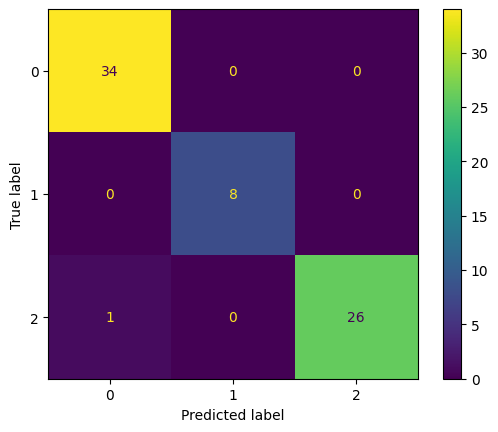

In [37]:
ConfusionMatrixDisplay.from_predictions(y_test, label)